In [1]:
api_key = 'W4KB22GXZC6HLLMP'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [3]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.sectorperformance import SectorPerformances

In [4]:
import pandas as pd
import os

In [5]:
p = 'data/tsla/'
os.makedirs(p, exist_ok=True)
PATH = p

In [6]:
stock = 'TSLA'

# Time Series

In [8]:
ts = TimeSeries(key=api_key, output_format='pandas')
ts_data, meta_data = ts.get_daily(stock, outputsize='full')

In [14]:
prices = ts_data[['4. close','5. volume']].rename(index=str, columns={"4. close": "price", '5. volume': 'volume'})
prices = prices.tail(1000)

In [ ]:
# offset price data as the previous trading day's close: prev_close
p_1 = prices.as_matrix(['price']).squeeze()[:-1]  # drop last value in the array of prices
prices = prices[1:].copy()  # drop first row in df
prices['prev_close'] = p_1
prices.head()

In [ ]:
# offset price data as the next day's close: next_close (this is the value we're trying to predict)
n_1 = prices.as_matrix(['price']).squeeze()[1:]  # drop first value in the array of prices
# append fake to end to make right length  **REMOVE last row after merges**
n_1 = np.append(n_1, np.mean(n_1))
prices['next_close'] = n_1
prices.tail()

# Technical Indicators

In [10]:
ti = TechIndicators(key=api_key, output_format='pandas')

In [11]:
# exponential moving averages (weighted towards recent movements)
ema_10_data, meta = ti.get_ema(stock, time_period=10)
ema_50_data, meta = ti.get_ema(stock, time_period=50)
ema_200_data, meta = ti.get_ema(stock, time_period=200)
ema10 = ema_10_data.tail(1000).rename(index=str, columns={"EMA": "ema10"})
ema50 = ema_50_data.tail(1000).rename(index=str, columns={"EMA": "ema50"})
ema200 = ema_200_data.tail(1000).rename(index=str, columns={"EMA": "ema200"})

In [12]:
# moving average convergence divergence
macd, meta = ti.get_macd(stock)
macd = macd.tail(100)

In [13]:
# stochastic oscillator
so, meta = ti.get_stoch(stock)
so = so.tail(1000)

In [15]:
# rate of change
roc, meta = ti.get_roc(stock)
roc = roc.tail(1000)

In [16]:
# average directional movement index
adx, meta = ti.get_adx(stock)
adx = adx.tail(1000)

In [17]:
# relative strength index
rsi, meta = ti.get_rsi(stock)
rsi = rsi.tail(1000)

In [18]:
# on-balance volume
obv, meta = ti.get_obv(stock)
obv = obv.tail(1000)

In [19]:
# commodity channel index
cci, meta = ti.get_cci(stock)
cci = cci.tail(1000)

In [20]:
# Chaikin A/D line
ad, meta = ti.get_ad(stock)
ad = ad.tail(1000)

In [21]:
# Aroon values
aroon, meta = ti.get_aroon(stock)
aroon = aroon.tail(1000)

### join dfs

In [22]:
df = prices.join(ema10)
df = df.join(ema50)
df = df.join(ema200)
df = df.join(macd)
df = df.join(so)
df = df.join(roc)
df = df.join(adx)
df = df.join(rsi)
df = df.join(obv)
df = df.join(cci)
df = df.join(ad)
df = df.join(aroon)

In [23]:
df.tail()

,price,volume,ema10,ema50,ema200,MACD_Signal,MACD_Hist,MACD,SlowD,SlowK,ROC,ADX,RSI,OBV,CCI,Chaikin A/D,Aroon Down,Aroon Up
date,,,,,,,,,,,,,,,,,,
2018-05-18,276.82,7251887.0,289.3731,299.3293,313.3454,-1.4826,-1.5992,-3.0818,13.0103,13.9185,-4.6238,13.0771,42.0497,347153798.0,-109.5258,1.706525e+08,100.0,70.0
2018-05-21,284.49,9182571.0,288.4853,298.7473,313.0582,-1.8480,-1.4616,-3.3096,18.7833,27.7756,0.3952,13.0970,45.4339,356336369.0,-50.6148,1.672192e+08,95.0,65.0
2018-05-22,275.01,8945756.0,286.0352,297.8165,312.6796,-2.3197,-1.8868,-4.2066,22.5514,25.9602,-2.9810,13.3928,42.2257,347390613.0,-102.8579,1.602224e+08,100.0,60.0
2018-05-23,279.07,5971542.0,284.7688,297.0813,312.3452,-2.7633,-1.7743,-4.5376,29.0259,33.3419,-0.5771,13.6739,44.0081,353362155.0,-108.6757,1.644966e+08,95.0,55.0
2018-05-24,277.85,4194011.0,283.5109,296.3271,312.0020,-3.1791,-1.6633,-4.8425,26.9403,21.5187,-2.6727,13.8773,43.5828,349168144.0,-102.1261,1.642943e+08,90.0,50.0


In [ ]:
# remove last row (fake next_close data)
df = df[:-1]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 2014-06-06 to 2018-05-24
Data columns (total 18 columns):
price          1000 non-null float64
volume         1000 non-null float64
ema10          1000 non-null float64
ema50          1000 non-null float64
ema200         1000 non-null float64
MACD_Signal    1000 non-null float64
MACD_Hist      1000 non-null float64
MACD           1000 non-null float64
SlowD          1000 non-null float64
SlowK          1000 non-null float64
ROC            1000 non-null float64
ADX            1000 non-null float64
RSI            1000 non-null float64
OBV            1000 non-null float64
CCI            1000 non-null float64
Chaikin A/D    1000 non-null float64
Aroon Down     1000 non-null float64
Aroon Up       1000 non-null float64
dtypes: float64(18)
memory usage: 188.4+ KB


In [25]:
df.reset_index(inplace=True)
df.to_feather(f'{PATH}original_1000')

# Fastai Structured

In [26]:
df = pd.read_feather(f'{PATH}original_1000')
df.head()

,date,price,volume,ema10,ema50,ema200,MACD_Signal,MACD_Hist,MACD,SlowD,SlowK,ROC,ADX,RSI,OBV,CCI,Chaikin A/D,Aroon Down,Aroon Up
0,2014-06-06,208.171,3073800.0,205.5908,204.3624,177.4997,0.1981,1.0464,1.2444,34.7453,48.2549,16.5636,11.3504,52.6447,289310000.0,72.3467,2.591509e+07,5.0,75.0
1,2014-06-09,205.310,2805700.0,205.5397,204.3996,177.7764,0.3922,0.7766,1.1689,45.1972,55.6666,12.6468,10.8265,50.6495,286504300.0,49.7303,2.418515e+07,0.0,70.0
2,2014-06-10,202.300,3514700.0,204.9507,204.3172,178.0204,0.4850,0.3712,0.8562,50.2103,46.7096,9.5468,10.5141,48.6092,282989600.0,18.2753,2.164316e+07,0.0,65.0
3,2014-06-11,204.470,3977500.0,204.8633,204.3232,178.2836,0.5430,0.2317,0.7746,46.4165,36.8735,7.5252,10.3747,50.1336,286967100.0,4.4669,2.488729e+07,0.0,60.0
4,2014-06-12,203.520,5993700.0,204.6191,204.2917,178.5347,0.5596,0.0665,0.6261,39.0128,33.4554,6.7674,9.8724,49.4575,280973400.0,28.4393,2.024781e+07,5.0,55.0


In [27]:
from fastai.fastai.structured import *
from fastai.fastai.column_data import *

In [28]:
# feature extraction of dates
add_datepart(df, 'date')
df.head()

,price,volume,ema10,ema50,ema200,MACD_Signal,MACD_Hist,MACD,SlowD,SlowK,...,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,208.171,3073800.0,205.5908,204.3624,177.4997,0.1981,1.0464,1.2444,34.7453,48.2549,...,6,4,157,False,False,False,False,False,False,1402012800
1,205.310,2805700.0,205.5397,204.3996,177.7764,0.3922,0.7766,1.1689,45.1972,55.6666,...,9,0,160,False,False,False,False,False,False,1402272000
2,202.300,3514700.0,204.9507,204.3172,178.0204,0.4850,0.3712,0.8562,50.2103,46.7096,...,10,1,161,False,False,False,False,False,False,1402358400
3,204.470,3977500.0,204.8633,204.3232,178.2836,0.5430,0.2317,0.7746,46.4165,36.8735,...,11,2,162,False,False,False,False,False,False,1402444800
4,203.520,5993700.0,204.6191,204.2917,178.5347,0.5596,0.0665,0.6261,39.0128,33.4554,...,12,3,163,False,False,False,False,False,False,1402531200


In [29]:
df.drop(['Elapsed', 'Is_year_end', 'Is_year_start'], axis=1, inplace=True)

In [30]:
df.columns

Index(['price', 'volume', 'ema10', 'ema50', 'ema200', 'MACD_Signal',
       'MACD_Hist', 'MACD', 'SlowD', 'SlowK', 'ROC', 'ADX', 'RSI', 'OBV',
       'CCI', 'Chaikin A/D', 'Aroon Down', 'Aroon Up', 'Year', 'Month', 'Week',
       'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end', 'Is_month_start',
       'Is_quarter_end', 'Is_quarter_start'],
      dtype='object')

In [31]:
cat_vars = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear']

In [32]:
contin_vars = ['price', 'volume', 'ema10', 'ema50',
       'ema200', 'MACD_Hist', 'MACD', 'MACD_Signal', 'SlowK', 'SlowD', 'ROC',
       'ADX', 'RSI', 'OBV', 'CCI', 'Chaikin A/D', 'Aroon Up', 'Aroon Down']

In [33]:
for v in cat_vars: df[v] = df[v].astype('category').cat.as_ordered()
for c in contin_vars: df[c] = df[c].astype('float32')

In [35]:
df['next_close'] = df['price']

In [37]:
# save original df for embeddings
df_orig = df.copy()

In [38]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_vars]
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(6, 3), (13, 7), (54, 27), (32, 16), (6, 3), (363, 50)]

In [75]:
df, y, nas, mapper = proc_df(df, 'next_close', do_scale=True)

In [76]:
df.head()

,price,volume,ema10,ema50,ema200,MACD_Signal,MACD_Hist,MACD,SlowD,SlowK,...,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start
0,-0.909291,-0.801410,-0.967704,-1.010018,-1.607363,-0.075568,0.490528,0.095175,-0.752373,-0.172213,...,1,6,23,6,5,156,-0.184733,-0.178862,-0.110208,-0.08396
1,-0.963900,-0.894543,-0.968695,-1.009254,-1.600509,-0.042866,0.365540,0.083399,-0.314073,0.116038,...,1,6,24,9,1,159,-0.184733,-0.178862,-0.110208,-0.08396
2,-1.021352,-0.648251,-0.980126,-1.010946,-1.594466,-0.027231,0.177735,0.034630,-0.103848,-0.232312,...,1,6,24,10,2,160,-0.184733,-0.178862,-0.110208,-0.08396
3,-0.979933,-0.487484,-0.981822,-1.010823,-1.587947,-0.017459,0.113111,0.021903,-0.262941,-0.614852,...,1,6,24,11,3,161,-0.184733,-0.178862,-0.110208,-0.08396
4,-0.998066,0.212900,-0.986561,-1.011470,-1.581728,-0.014662,0.036580,-0.001258,-0.573415,-0.747786,...,1,6,24,12,4,162,-0.184733,-0.178862,-0.110208,-0.08396


In [ ]:
# Add offset same-scaled price as prev_close values

price_scaled = df['price']

# drop last value of price_scaled
price_scaled = price_scaled[:-1].copy()

# drop first row of df
df = df[1:].copy()
df.reset_index(inplace=True, drop=True)

df = df.assign(prev_close=price_scaled.values)

In [79]:
df.head()

,price,volume,ema10,ema50,ema200,MACD_Signal,MACD_Hist,MACD,SlowD,SlowK,...,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,prev_close
0,-0.963900,-0.894543,-0.968695,-1.009254,-1.600509,-0.042866,0.365540,0.083399,-0.314073,0.116038,...,6,24,9,1,159,-0.184733,-0.178862,-0.110208,-0.08396,-0.909291
1,-1.021352,-0.648251,-0.980126,-1.010946,-1.594466,-0.027231,0.177735,0.034630,-0.103848,-0.232312,...,6,24,10,2,160,-0.184733,-0.178862,-0.110208,-0.08396,-0.963900
2,-0.979933,-0.487484,-0.981822,-1.010823,-1.587947,-0.017459,0.113111,0.021903,-0.262941,-0.614852,...,6,24,11,3,161,-0.184733,-0.178862,-0.110208,-0.08396,-1.021352
3,-0.998066,0.212900,-0.986561,-1.011470,-1.581728,-0.014662,0.036580,-0.001258,-0.573415,-0.747786,...,6,24,12,4,162,-0.184733,-0.178862,-0.110208,-0.08396,-0.979933
4,-0.942713,-0.637969,-0.980207,-1.009755,-1.574854,-0.008782,0.070398,0.015555,-0.532826,-0.119383,...,6,24,13,5,163,-0.184733,-0.178862,-0.110208,-0.08396,-0.998066


In [89]:
# sync up y values (as next days close) w/ df

# remove first two values from y
y = y[2:].copy()

# remove last row from df
df = df[:-1].copy()

len(y), len(df)

(998, 998)

## Separate train/val/test

In [90]:
trn_df = df[:900].copy()
trn_y = y[:900].copy()

# val_df = df[700:900].copy()
# val_y = y[700:900].copy()
val_idxs = list(range(850,900))

test_df = df[900:].copy()
test_y = y[900:].copy()

In [91]:
def inv_y(a): return np.exp(a)
def y_log(a): return np.log(a)

def exp_rmspe(y_pred, targ):
    targ = inv_y(targ)
    pred = inv_y(y_pred)
    pct_var = (targ - pred)/targ
    return math.sqrt((pct_var**2).mean())

# def rmsle(pred, targ):
#     # pred and targs are both log1p values already
#     mean_diff = np.square(pred - targ).mean()
#     return round(math.sqrt(mean_diff), 4)

trn_yl = np.log(trn_y)
yl = np.log(y)
max_log_y = np.max(yl)
y_range = (0, max_log_y*1.2)

In [138]:
### IMPORTANT
# y needs to be log values!!
# need to use small bs if few pieces of data (1000)

md = ColumnarModelData.from_data_frame(PATH, val_idxs, trn_df, trn_yl, cat_flds=cat_vars,
                                        bs=10, test_df=test_df)

In [139]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)

/Users/adamschiller/Projects/DeepLearning/fastai/fastai/column_data.py:101: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  for o in self.lins: kaiming_normal(o.weight.data)
/Users/adamschiller/Projects/DeepLearning/fastai/fastai/column_data.py:103: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  kaiming_normal(self.outp.weight.data)


## Training

In [140]:
m.lr_find()

A Jupyter Widget

epoch      trn_loss   val_loss                            
    0      1.97217    1.884546  



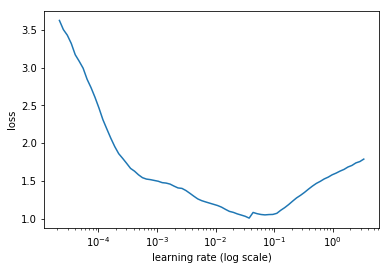

In [141]:
m.sched.plot(5)

In [142]:
lr = 1e-4

In [143]:
m.fit(lr, 3, metrics=[exp_rmspe])

A Jupyter Widget

epoch      trn_loss   val_loss   exp_rmspe                 
    0      0.19568    0.100131   0.23875   
    1      0.056066   0.093827   0.233099                   
    2      0.02561    0.080342   0.221767                   



[0.080342411994934082, 0.22176702182254346]

In [144]:
m.fit(lr, 5, cycle_len=1, metrics=[exp_rmspe])

A Jupyter Widget

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.017343   0.056052   0.183144  
    1      0.012621   0.060802   0.192758                   
    2      0.011721   0.046363   0.170695                   
    3      0.00946    0.043509   0.167832                    
    4      0.00955    0.030517   0.143224                    



[0.030516732484102249, 0.1432239719373615]

In [144]:
m.fit(lr, 2, cycle_len=4, metrics=[exp_rmspe])

A Jupyter Widget

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.017343   0.056052   0.183144  
    1      0.012621   0.060802   0.192758                   
    2      0.011721   0.046363   0.170695                   
    3      0.00946    0.043509   0.167832                    
    4      0.00955    0.030517   0.143224                    



[0.030516732484102249, 0.1432239719373615]

In [145]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.08, 1, [1000,500], [0.01,0.1], y_range=y_range)

/Users/adamschiller/Projects/DeepLearning/fastai/fastai/column_data.py:101: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  for o in self.lins: kaiming_normal(o.weight.data)
/Users/adamschiller/Projects/DeepLearning/fastai/fastai/column_data.py:103: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  kaiming_normal(self.outp.weight.data)


In [146]:
m.fit(lr, 3, metrics=[exp_rmspe])

A Jupyter Widget

epoch      trn_loss   val_loss   exp_rmspe                 
    0      0.19815    0.005726   0.072941  
    1      0.081451   0.017278   0.143823                   
    2      0.068257   0.008141   0.086546                   



[0.0081406095996499062, 0.086546377322792023]

In [147]:
m.fit(lr, 2, cycle_len=4, metrics=[exp_rmspe])

A Jupyter Widget

epoch      trn_loss   val_loss   exp_rmspe                  
    0      0.063185   0.041374   0.18176   
    1      0.044022   0.00547    0.07797                    
    2      0.032748   0.003234   0.055359                   
    3      0.026147   0.00224    0.04892                    
    4      0.044527   0.001826   0.043977                   
    5      0.056596   0.00398    0.066548                   
    6      0.042439   0.001333   0.036707                   
    7      0.043708   0.001251   0.036218                   



[0.0012514183763414621, 0.036217712202747325]

In [149]:
m.save(f'{stock}_0.036rmspe')

In [158]:
preds,targs=m.predict_with_targs()
exp_rmspe(preds,targs)

0.036217712202747325

In [164]:
for p,t in zip(inv_y(preds), inv_y(targs)):
    print(f'predicted: {p}  actual: {t}')

predicted: [ 359.08453]  actual: [ 331.10007]
predicted: [ 330.47403]  actual: [ 328.98007]
predicted: [ 325.73392]  actual: [ 331.66006]
predicted: [ 329.13461]  actual: [ 325.20004]
predicted: [ 303.77118]  actual: [ 317.29001]
predicted: [ 326.62155]  actual: [ 311.64008]
predicted: [ 317.59332]  actual: [ 315.35992]
predicted: [ 313.4985]  actual: [ 311.35001]
predicted: [ 314.51834]  actual: [ 320.52994]
predicted: [ 326.82797]  actual: [ 317.25006]


### Test predictions

# RandomForest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idxs, df.values, yl)

In [175]:
val.shape, trn.shape, y_val.shape, y_trn.shape

((10, 29), (988, 29), (10,), (988,))

In [176]:
def print_score(m):
    res = [exp_rmspe(m.predict(trn), y_trn), exp_rmspe(m.predict(val), y_val),
                round(m.score(trn, y_trn),4), round(m.score(val, y_val),4)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [173]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [177]:
print_score(m)

[0.012189362331844162, 0.023505708478655764, 0.99629999999999996, -0.035700000000000003, 0.98166316529986497]


## Feature Importance

In [180]:
features = list(df.columns)

# Get numerical feature importances
importances = list(m.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: price                Importance: 0.96
Variable: prev_close           Importance: 0.02
Variable: volume               Importance: 0.0
Variable: ema10                Importance: 0.0
Variable: ema50                Importance: 0.0
Variable: ema200               Importance: 0.0
Variable: MACD_Signal          Importance: 0.0
Variable: MACD_Hist            Importance: 0.0
Variable: MACD                 Importance: 0.0
Variable: SlowD                Importance: 0.0
Variable: SlowK                Importance: 0.0
Variable: ROC                  Importance: 0.0
Variable: ADX                  Importance: 0.0
Variable: RSI                  Importance: 0.0
Variable: OBV                  Importance: 0.0
Variable: CCI                  Importance: 0.0
Variable: Chaikin A/D          Importance: 0.0
Variable: Aroon Down           Importance: 0.0
Variable: Aroon Up             Importance: 0.0
Variable: Year                 Importance: 0.0
Variable: Month                Importance: 0.0
Variable: W

## Feature Reduction

# Vanilla Neural Network